In [1]:
from openpyxl import Workbook
from openpyxl import load_workbook
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#Prepping Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


data = pd.read_csv("data.csv")



XLabels = ['TotalT','Temp','LSR','CA','Size','Mass','Moisture', 'IsoT', 'HeatT', 'Ramp','F_X', 'Ro', 'logRo', 'P']

train = data.copy()
test = data.copy()

# counter = 0
# for i in data.index:
#     if not train.at[i, 'Source'] == "Generation of xylose solutions from Eucalyptus globulus wood.xlsx":
#         counter = counter + 1

# print(counter)

# train = train[train['Source'] != "Generation of xylose solutions from Eucalyptus globulus wood.xlsx"]
# test = test[test['Source'] == "Generation of xylose solutions from Eucalyptus globulus wood.xlsx"]

train = train[train['Source'] != "MildAutohydrolysisAnEnvironmentallyFriendlyTechnologXyl.xlsx"]
test = test[test['Source'] == "MildAutohydrolysisAnEnvironmentallyFriendlyTechnologXyl.xlsx"]



train = train.sample(frac=1).reset_index(drop=True)
test = test.sample(frac=1).reset_index(drop=True)

X_train = train[['TotalT','Temp','LSR','CA','Size','Mass','Moisture', 'IsoT', 'HeatT', 'Ramp','F_X']].values
y_train = train['Yield'].values

# plt.hist(y_train)
# plt.hist(y_test)

X_test = test[['TotalT','Temp','LSR','CA','Size','Mass','Moisture', 'IsoT', 'HeatT', 'Ramp','F_X']].values
y_test = test['Yield'].values

print(train)

X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)


print(len(X_train), len(X_test), len(X_valid))

         TotalT    Temp    LSR        CA   Size           Mass  Moisture  \
0    532.192261  373.65   8.00  0.407872  8.000      16.670000      20.0   
1    110.535610  373.65   8.00  0.203936  8.000      16.670000      20.0   
2     20.000000  403.15   8.00  0.810463  0.500       3.000000       0.0   
3    113.347790  408.15   8.00  0.203936  8.000      16.670000      20.0   
4    116.306262  398.15   8.00  0.101968  8.000      16.670000      20.0   
5    201.588715  373.65   8.00  0.203936  8.000      16.670000      20.0   
6     53.552343  373.65   8.00  0.407872  8.000      16.670000      20.0   
7    155.661484  398.15   8.00  0.101968  8.000      16.670000      20.0   
8    300.000000  423.15   3.70  0.000000  2.000      21.276596      10.0   
9     76.333330  408.15   8.00  0.101968  8.000      16.670000      20.0   
10     0.000000  398.15   8.00  0.405232  0.500       3.000000       0.0   
11   151.687725  373.65   8.00  0.203936  8.000      16.670000      20.0   
12    15.221

average 53.27690074178741
average 13.093757618710132
Mean Absolute Error: 40.18314312307728
Mean Squared Error: 1746.6978099844691
Root Mean Squared Error: 41.79351397028574
[51.51320088 61.65660915 50.49694777 52.03101345 48.87770809 70.17400919
 48.53701209 78.69140922 73.5809692  51.65970016 52.10941888 50.190478
 48.65057743 48.10782417 49.2184041  49.04805609 44.88500102 48.91286799
 53.92646422 49.67266543 52.65468911 53.35863756 49.19678133 47.48533391
 51.10452231 51.60514345 58.48720267 52.17787134 50.07107777 53.13920912
 51.79711422 51.32613133 56.71558347 50.3549911 ]
[ 0.97012048  7.25204819  2.70149398  0.83122892 11.40819277 24.42795181
  1.81937349 39.01686747 29.64433735  1.83421687  5.46024096 14.72674699
  4.10525301  0.         21.54409639 17.0486747   0.          1.01783133
 30.58795181 35.07277108 31.21349398 22.95421687  3.14255422  0.
  9.28771084  0.1060241  31.00144578 39.12289157  0.6106988   0.33079518
  2.84144578 32.1253012  21.37445783  1.6073253 ]


(0.0, 78.69140921830397)

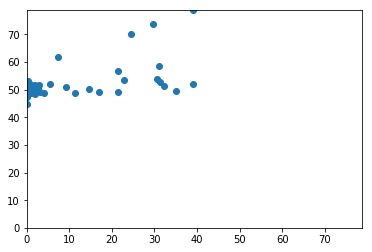

In [3]:
#Multiple Linear Regression Simple
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import metrics


# with sklearn

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

coeffs = dict(zip(XLabels, regr.coef_))

# print("results of SKLearnLinearRegression----------------")
# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', coeffs)
# print('Score', regr.score(X,Y))
y_pred = regr.predict(X_test)



print('average', y_pred.mean())

print('average', y_test.mean())

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print("Coefficients: ", best_model.coef_)

error_arr = abs(y_test - y_pred)
#plt.hist(error_arr)

print(y_pred)
print(y_test)

plt.scatter(y_test, y_pred)
plt.ylim(np.min((np.min([np.min(y_test), np.min(y_pred)]))), np.max((np.max([np.max(y_test), np.max(y_pred)]))))
plt.xlim(np.min((np.min([np.min(y_test), np.min(y_pred)]))), np.max((np.max([np.max(y_test), np.max(y_pred)]))))

best alpha is:  0.001
Lowest Error In Validation _MSE_  1826.3513078859467
average 13.093757618710132
Mean Absolute Error: 40.18333430012333
Mean Squared Error: 1746.7132277006956
Root Mean Squared Error: 41.79369842094255


(0.0, 78.69160207969847)

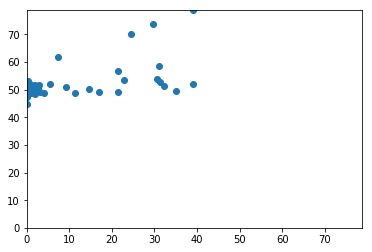

In [4]:
#Linear Least Square with I2 regularization
#Ridge
from sklearn.linear_model import Ridge
from sklearn import metrics


alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]
errors = []

#Creating Different models for different alphas
for a in alphas:
    ridgeModel = Ridge(alpha=a)
    ridgeModel.fit(X_train, y_train) 
    y_pred = ridgeModel.predict(X_valid)
    error =  metrics.mean_squared_error(y_valid, y_pred)
    errors.append(error)
    

best_alpha = alphas[np.argmin(errors)]
print("best alpha is: ",best_alpha)
print("Lowest Error In Validation _MSE_ ", np.min(errors))

best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

    
#Evaluation
print('average', y_test.mean())
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print("Coefficients: ", best_model.coef_)

error_arr = abs(y_test - y_pred)
#plt.hist(error_arr)
plt.scatter(y_test, y_pred)

plt.ylim(np.min((np.min([np.min(y_test), np.min(y_pred)]))), np.max((np.max([np.max(y_test), np.max(y_pred)]))))
plt.xlim(np.min((np.min([np.min(y_test), np.min(y_pred)]))), np.max((np.max([np.max(y_test), np.max(y_pred)]))))


In [ ]:
#SVM Models
from sklearn.svm import SVR


kernels =  ['linear', 'poly', 'rbf', 'sigmoid']
gammas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
Cs =[0.1, 0.5, 1, 5, 10, 50, 100]
#Cs =[0.1, 0.5, 1]
errors = []

for kern in kernels:
    for gam in gammas:
        for C_ in Cs:
            svrModel = SVR(kernel=kern, gamma=gam, cache_size=1000, C=C_)
            svrModel.fit(X_train, y_train) 
            y_pred = svrModel.predict(X_valid)
            error =  metrics.mean_squared_error(y_valid, y_pred)
            errors.append(error)
        
        
#For 2D
# index_of_lowest_error = np.argmin(errors)
# print("Lowest Error In Validation _MSE_ ", np.min(errors))

# best_kernel = kernels[int(index_of_lowest_error / len(gammas))]
# best_gamma = gammas[index_of_lowest_error % len(gammas)]
# print("Best kernel is: ", best_kernel)
# print("Best Gamma is: ", best_gamma)

#For3d
index_of_lowest_error = np.argmin(errors)
print("Lowest Error In Validation _MSE_ ", np.min(errors))

best_kernel = kernels[int(index_of_lowest_error / (len(gammas) * len(Cs)))] #Good
best_gamma = gammas[int((index_of_lowest_error % (len(gammas) * len(Cs)))/len(Cs))] #Good
best_C = Cs[index_of_lowest_error % len(Cs)] #Good 
print("Best kernel is: ", best_kernel)
print("Best Gamma is: ", best_gamma)
print("Best C is: ", best_C)

best_model = SVR(kernel=best_kernel, gamma=best_gamma, cache_size=1000, C=best_C)
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)


print('average', y_test.mean())
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

error_arr = abs(y_test - y_pred)
#plt.hist(error_arr)

plt.scatter(y_test, y_pred)
plt.ylim(np.min((np.min([np.min(y_test), np.min(y_pred)]))), np.max((np.max([np.max(y_test), np.max(y_pred)]))))
plt.xlim(np.min((np.min([np.min(y_test), np.min(y_pred)]))), np.max((np.max([np.max(y_test), np.max(y_pred)]))))
# vectors = np.asarray(best_model.support_vectors_)
# print(vectors.shape)
# print(vectors)

In [195]:
##Random Forest

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import sklearn


#Training
regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)



#Evaluation
print('average', y_test.mean())
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


#Getting Shape of Forest
params = regressor.get_params()
path = regressor.decision_path(X_train)

#print(params)
#print(path)

average 0.5278839901926725
Mean Absolute Error: 0.02878105149290653
Mean Squared Error: 0.0018747801844422002
Root Mean Squared Error: 0.043298731903396434


In [194]:
#Keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=4, activation='relu', input_dim=14))
model.add(Dense(units=1, activation='softmax'))

model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

model.fit(X_train, y_train, epochs=40, batch_size=32)

loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)
                                  
classes = model.predict(X_test, batch_size=128)



417 417
90 90
Epoch 1/40
417/417 [==============================] - 0s 325us/step - loss: 0.2914 - acc: 0.0000e+00
Epoch 2/40
417/417 [==============================] - 0s 26us/step - loss: 0.2914 - acc: 0.0000e+00
Epoch 3/40
417/417 [==============================] - 0s 43us/step - loss: 0.2914 - acc: 0.0000e+00
Epoch 4/40
417/417 [==============================] - 0s 24us/step - loss: 0.2914 - acc: 0.0000e+00
Epoch 5/40
417/417 [==============================] - 0s 36us/step - loss: 0.2914 - acc: 0.0000e+00
Epoch 6/40
417/417 [==============================] - 0s 43us/step - loss: 0.2914 - acc: 0.0000e+00
Epoch 7/40
417/417 [==============================] - 0s 36us/step - loss: 0.2914 - acc: 0.0000e+00
Epoch 8/40
417/417 [==============================] - 0s 33us/step - loss: 0.2914 - acc: 0.0000e+00
Epoch 9/40
417/417 [==============================] - 0s 29us/step - loss: 0.2914 - acc: 0.0000e+00
Epoch 10/40
417/417 [==============================] - 0s 43us/step - loss: 0.2914 - 